In [300]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch


torch.manual_seed(1234)

# Import Dataset from CSV File in Data Folder
data=pd.read_csv("data/cardetailsv3.csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [301]:
# Analyze Data
data.info()
data.describe()
data.columns
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [302]:
# Show all unique names
data['name'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [303]:
def convert_col_to_numerical(data, col):
    unique_vals = data[col].unique()
    val_dict = {}
    count = 0
    for val in unique_vals:
        val_dict[val] = count
        count += 1
    data[col] = data[col].replace(val_dict)
    return data

In [304]:
# Get rid of torque
data = data.drop('torque', axis=1)

# Edit every name in name column to be just 2 words
data['name'] = data['name'].str.split(' ').str[:2].str.join(' ')
data['name'] = data['name'].str.replace(' ', '_')

# Convert categorical columns to numerical
data = convert_col_to_numerical(data, 'name')
data = convert_col_to_numerical(data, 'fuel')
data = convert_col_to_numerical(data, 'seller_type')
data = convert_col_to_numerical(data, 'transmission')
data = convert_col_to_numerical(data, 'owner')

# Edit every numerical column to be just the number
data['mileage'] = data['mileage'].str.split(' ').str[0]
data['engine'] = data['engine'].str.split(' ').str[0]
data['max_power'] = data['max_power'].str.split(' ').str[0]

# Convert numerical columns to numerical
data['mileage'] = pd.to_numeric(data['mileage'])
data['engine'] = pd.to_numeric(data['engine'])
data['max_power'] = pd.to_numeric(data['max_power'])


In [305]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,2014,450000,145500,0,0,0,0,23.40,1248.0,74.00,5.0
1,1,2014,370000,120000,0,0,0,1,21.14,1498.0,103.52,5.0
2,2,2006,158000,140000,1,0,0,2,17.70,1497.0,78.00,5.0
3,3,2010,225000,127000,0,0,0,0,23.00,1396.0,90.00,5.0
4,0,2007,130000,120000,1,0,0,0,16.10,1298.0,88.20,5.0


In [306]:
# What are the datatypes
data.dtypes


name               int64
year               int64
selling_price      int64
km_driven          int64
fuel               int64
seller_type        int64
transmission       int64
owner              int64
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

In [307]:
# Convert dataset to all floats
data = data.astype(float)

In [308]:
# Analyse the NAN values
data.isnull().sum()

# fill null values with mean
data['mileage'] = data['mileage'].fillna(data['mileage'].mean())
data['engine'] = data['engine'].fillna(data['engine'].mean())
data['max_power'] = data['max_power'].fillna(data['max_power'].mean())
data['seats'] = data['seats'].fillna(data['seats'].mean())


In [309]:
# Analyse the Correlation between the columns
corr_matrix = data.corr()
corr_matrix['selling_price'].sort_values(ascending=False)


selling_price    1.000000
max_power        0.744958
transmission     0.588845
engine           0.453567
year             0.414092
seller_type      0.323047
name             0.126843
seats            0.041161
mileage         -0.125454
fuel            -0.202916
owner           -0.221915
km_driven       -0.225534
Name: selling_price, dtype: float64

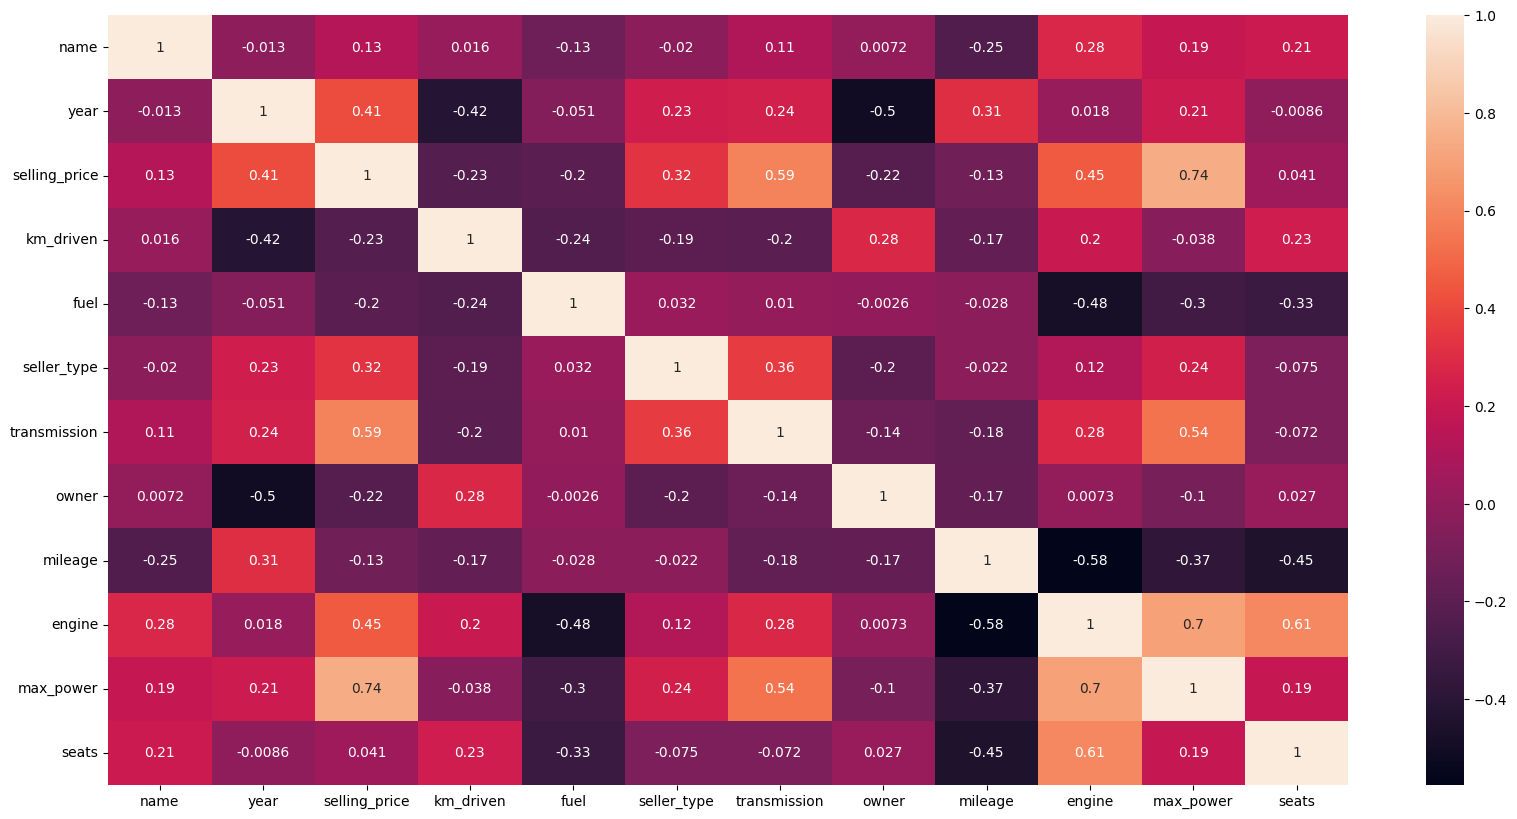

In [310]:
# Analyse the Correlation between the columns using a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [311]:
y=data["selling_price"]
X=data.drop("selling_price",axis=1)

scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

X=pd.DataFrame(X_scaled,columns=X.columns)
X.head()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train_tensor=torch.tensor(X_train.values, dtype=torch.float)

In [312]:
# # Split the data into training and testing data
# train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

# # Split the training data into X and y
# X_train = train_set.drop('selling_price', axis=1)
# y_train = train_set['selling_price']

# # Split the testing data into X and y
# X_test = test_set.drop('selling_price', axis=1)
# y_test = test_set['selling_price']

In [313]:
# # Scale the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

# # # Convert the data into a tensor
# # X_train = torch.Tensor(X_train)
# # y_train = torch.Tensor(y_train.values)
# # X_test = torch.Tensor(X_test)
# # y_test = torch.Tensor(y_test.values)

In [314]:
def relu(x):
    return torch.max(torch.tensor(0.0), x)

def root_mean_squared_error(y_hat,y):
    return torch.sqrt(torch.mean((y_hat-y)**2))

def get_batch(x,y,batch_size):
    for i in range(0,len(x),batch_size):
        # yield: return a generator
        yield x[i:i+batch_size],y[i:i+batch_size]

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900


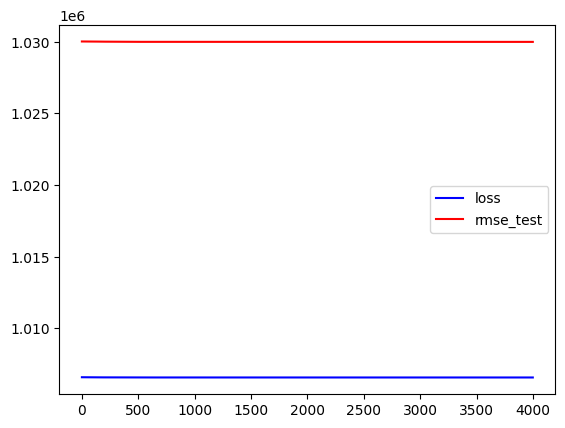

In [315]:
lr=0.001
wd=0.1
torch.manual_seed(1234)

batch_size=100
epochs=4000
losses=[]
rmse_test=[]

w1 = torch.normal(std=1, mean=0, size=(11, 15), dtype=torch.float32, requires_grad=True)
w2 = torch.normal(std=1, mean=0, size=(15, 1), dtype=torch.float32, requires_grad=True)

def forward(x, w1, w2, b1):
    z2 = x@w1+b1
    a2 = relu(z2)
    a2_norm = (a2-a2.mean())/a2.std()
    z3 = a2_norm@w2
    y_hat = relu(z3)
    return y_hat

b1=torch.zeros(15, requires_grad=True)
y_train_tensor=torch.tensor(y_train.values, dtype=torch.float32)
x_test_tensor=torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor=torch.tensor(y_test.values, dtype=torch.float32)
for i in range(epochs):
    losses_in_epoch=[]
    # print the epoch number every 100 epochs
    if i%100==0:
        print(i)
    # trainiere jeweils mit einer kleinen Auswahl an Daten, der Batch
    # xb: ist die Auswahl der Daten für die Inputneuronen
    # yb: ist die Auswahl der Daten für die Outputneuronen
    for xb,yb in get_batch(X_train_tensor,y_train_tensor,batch_size):
        y_hat=forward(xb, w1, w2, b1)
        loss=root_mean_squared_error(y_hat, yb)+torch.sum(w2**2)*wd
        losses_in_epoch.append(loss.item())
        loss.backward()
        with torch.no_grad():
            w1.sub_(lr*w1.grad)
            w2.sub_(lr*w2.grad)
            b1.sub_(lr*b1.grad)
            w1.grad.zero_()
            w2.grad.zero_()
            b1.grad.zero_()
    losses.append(sum(losses_in_epoch)/len(losses_in_epoch))
    y_test_hat=forward(x_test_tensor, w1, w2, b1)
    y_test_rmse=root_mean_squared_error(y_test_hat, y_test_tensor)
    rmse_test.append(y_test_rmse.item())

plt.plot(range(epochs),losses, color="blue")
plt.plot(range(epochs),rmse_test, color="red")
plt.legend(["loss", "rmse_test"])
plt.show()

In [316]:
# print the lowest rmse and loss
print(min(rmse_test))
print(min(losses))

1029976.25
1006571.40625
